In [2]:
## load initial packages
import pandas as pd
import numpy as np
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
## load datasets
hls = pd.read_excel("../data/HLS_data/national_hl_scores.xlsx")
hls.head()

,Census block group ID,Health literacy estimate
0,10010201001,248.91
1,10010201002,248.66
2,10010202001,233.55
3,10010202002,238.55
4,10010203001,247.96


In [21]:
hls['Census block group ID'] = hls['Census block group ID'].astype(str)
hls['Census block group ID'] = hls['Census block group ID'].apply(lambda x: x.zfill(12) if len(x) == 11 else x)
hls.head()

,Census block group ID,Health literacy estimate
0,010010201001,248.91
1,010010201002,248.66
2,010010202001,233.55
3,010010202002,238.55
4,010010203001,247.96


In [32]:
us_map1 = gpd.read_file("../tl_2022_01_bg/tl_2022_01_bg.shp")
us_map2 = gpd.read_file("../tl_2022_02_bg/tl_2022_02_bg.shp")

In [33]:
us_map1.info
us_map2
hls.info

merged = pd.merge(us_map, hls, left_on = "GEOID", right_on = "Census block group ID")
merged.sort_values("GEOID").head()



<bound method DataFrame.info of      STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0         01      017  954800        2  010179548002  Block Group 2  G5030   
1         01      017  954800        4  010179548004  Block Group 4  G5030   
2         01      017  954800        3  010179548003  Block Group 3  G5030   
3         01      015  001103        1  010150011031  Block Group 1  G5030   
4         01      015  002400        3  010150024003  Block Group 3  G5030   
...      ...      ...     ...      ...           ...            ...    ...   
3920      01      015  002105        1  010150021051  Block Group 1  G5030   
3921      01      095  030702        3  010950307023  Block Group 3  G5030   
3922      01      095  030801        2  010950308012  Block Group 2  G5030   
3923      01      095  030801        3  010950308013  Block Group 3  G5030   
3924      01      095  030903        1  010950309031  Block Group 1  G5030   

     FUNCSTAT     ALAND   AWATE

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,02,090,980100,1,020909801001,Block Group 1,G5030,S,1158960753,3928687,+64.6760436,-146.5481586,"POLYGON ((-147.17278 64.63431, -147.17270 64.6..."
1,02,090,001501,3,020900015013,Block Group 3,G5030,S,3991944,279702,+64.7163687,-147.1666273,"POLYGON ((-147.22505 64.72022, -147.22465 64.7..."
2,02,090,001902,3,020900019023,Block Group 3,G5030,S,2627042671,0,+65.1882765,-146.8575958,"POLYGON ((-148.14022 65.20988, -148.11904 65.2..."
3,02,090,000900,3,020900009003,Block Group 3,G5030,S,13815463,338636,+64.8165000,-147.9491164,"POLYGON ((-148.01295 64.80597, -148.01284 64.8..."
4,02,090,000200,3,020900002003,Block Group 3,G5030,S,304628,0,+64.8397521,-147.7420965,"POLYGON ((-147.74881 64.83832, -147.74879 64.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,02,122,000500,5,021220005005,Block Group 5,G5030,S,6120933,51437,+60.4923913,-151.0392504,"POLYGON ((-151.07976 60.49604, -151.07966 60.4..."
500,02,122,000200,4,021220002004,Block Group 4,G5030,S,52598978,68419065,+60.6855084,-151.3957175,"POLYGON ((-151.65012 60.65039, -151.64941 60.6..."
501,02,122,000702,2,021220007022,Block Group 2,G5030,S,18405658,1236498,+60.5109472,-151.1357421,"POLYGON ((-151.20407 60.52390, -151.17828 60.5..."
502,02,122,000600,5,021220006005,Block Group 5,G5030,S,37121672,181519,+60.5840246,-151.1718749,"POLYGON ((-151.27772 60.57446, -151.27651 60.5..."


<bound method DataFrame.info of        Census block group ID  Health literacy estimate
0               010010201001                    248.91
1               010010201002                    248.66
2               010010202001                    233.55
3               010010202002                    238.55
4               010010203001                    247.96
...                      ...                       ...
216859          560459511001                    249.46
216860          560459511002                    248.95
216861          560459513001                    248.07
216862          560459513002                    246.20
216863          560459513003                    253.89

[216864 rows x 2 columns]>

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Census block group ID,Health literacy estimate
2208,01,001,020100,1,010010201001,Block Group 1,G5030,S,4264299,28435,+32.4658320,-086.4896607,"POLYGON ((-86.51038 32.47225, -86.51031 32.472...",010010201001,248.91
181,01,001,020100,2,010010201002,Block Group 2,G5030,S,5561004,0,+32.4858732,-086.4896724,"POLYGON ((-86.50461 32.47723, -86.50453 32.477...",010010201002,248.66
193,01,001,020200,1,010010202001,Block Group 1,G5030,S,2058374,0,+32.4800823,-086.4749744,"POLYGON ((-86.48127 32.47744, -86.48126 32.477...",010010202001,233.55
194,01,001,020200,2,010010202002,Block Group 2,G5030,S,1262444,5669,+32.4644350,-086.4697659,"POLYGON ((-86.47611 32.46765, -86.47564 32.467...",010010202002,238.55
205,01,001,020300,1,010010203001,Block Group 1,G5030,S,3866513,9054,+32.4801750,-086.4607925,"POLYGON ((-86.47087 32.47573, -86.47084 32.475...",010010203001,247.96


<AxesSubplot:>

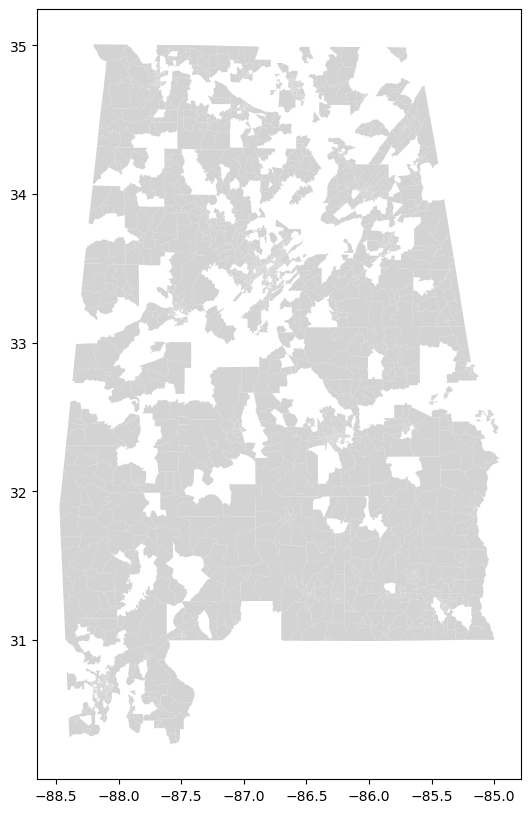

In [29]:
import matplotlib.pyplot as plt
import geopandas as gpd

fig, ax = plt.subplots(figsize = (10,10))
merged.plot(ax = ax, color = "lightgrey")

# us_map.plot(ax = ax, color='lightgrey')
# al_locations.plot(ax = ax)